# IMPORT LIBRARIES

### INSTALL OPENDATASETS MODULE TO FETCH KAGGLE DATASET

In [2]:
pip install opendatasets -q


In [48]:

import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

#MODEL SELECTIONS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#Thresholds
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# LOAD DATA

# Retrieving Dataset from Kaggle Portal

- The dataset is 150 MB, making it infeasible to upload on GitHub or access locally.
- To overcome this, we are fetching the dataset from the Kaggle portal.
- Initially, the `opendatasets` library was not installed.
- Installed the `opendatasets` library using the following pip command:


In [4]:
od.version()

'0.1.22'

In [5]:
dataset_url="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data"

### od.download(dataset_url)

  - this will ask you kaggle username and kaggle unique key
  - to get that goto kaggle portal and sign in
  - then click on your kaggle profile photo and go to settings
  - there see API and click on Create new token
  - one JSON file will download with your username and tokan number
  - insert that one by one after executing od.download

In [6]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prashantkumarsundge
Your Kaggle Key: ··········


100%|██████████| 66.0M/66.0M [00:00<00:00, 121MB/s]


In [7]:
data_dir="creditcardfraud"

In [8]:
os.listdir(data_dir)

['creditcard.csv']

In [9]:
creditcard=data_dir + '/creditcard.csv'
data=pd.read_csv(creditcard)

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# About the Dataset

## Context
Credit card companies aim to detect fraudulent transactions to prevent customers from being charged for unauthorized purchases.

## Content
The dataset comprises credit card transactions made by European cardholders in September 2013. It covers two days, featuring 492 frauds out of 284,807 transactions. Notably, the dataset is highly unbalanced, with fraudulent transactions accounting for only 0.172% of all transactions.

This dataset exclusively includes numerical input variables resulting from a PCA transformation. Due to confidentiality constraints, the original features and additional background information aren't provided. The features V1 through V28 represent principal components obtained via PCA. However, 'Time' and 'Amount' are the only features not subjected to PCA.
- 'Time' indicates the seconds elapsed between each transaction and the first recorded transaction.
- 'Amount' signifies the transaction amount, potentially useful for example-dependent cost-sensitive learning.
- 'Class' represents the response variable, assuming a value of 1 for fraud and 0 otherwise.

Considering the class imbalance ratio, it's advisable to evaluate accuracy using the Area Under the Precision-Recall Curve (AUPRC). Note that accuracy metrics derived from a confusion matrix may not hold significance for unbalanced classification problems.


## Rough Notes
  - Time, Amount and Class data are in normal format
  - remain data is in v1 v2 like variable names given for columns to hide the identity
  - from the observation  and given context about dataset are mentioned that dataset is applied PCA transformation
## Understanding from dataset
  - It covers two days, featuring **492 frauds out of 284,807 transactions**. Notably, the dataset is highly **unbalanced**
  - This dataset exclusively includes numerical input variables resulting from a PCA transformation. Due to confidentiality constraints
  - 'Class' represents the response variable, assuming a value of 1 for fraud and 0 otherwise.
  - will google it, potentially useful for example-dependent cost-sensitive learning
  - Considering the class imbalance ratio, it's advisable to evaluate accuracy using the Area Under the Precision-Recall Curve (AUPRC)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- Data is clean no duplicated no missingvalues etc

In [12]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- as mentioned in the context data is imbalanced
- if you see the data is in PCA transformed format so no EDA is required
- we will directly load the model and check the score and yes as we know the data is imbalanced so will work after that so understand the differance between before working on Imbalance data and after

## DATA IS IMBALANCE
### AS IF THE DATA IS IMBALANCE WE CAN USE 2 MOTHEDS EITHER YOU CAN ADD THE THRESHOLD OR YOU CAN RASAMPLING TECHNIQUE

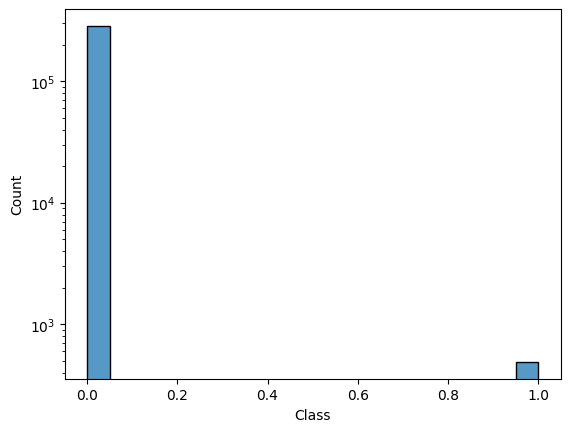

In [13]:
sns.histplot(data['Class'])
plt.yscale('log')
plt.show()

- Will understand if legit transaction and fraud transaction how much the amount used

In [14]:
data.groupby('Class')['Amount'].sum()

Class
0    25102462.04
1       60127.97
Name: Amount, dtype: float64

- We can see fraud AMount is around 60127

In [15]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
x_dummy=data.drop(columns='Class', axis=1)
y=data['Class']

# STANDARD SCALER

In [17]:
scaler=StandardScaler()
x=scaler.fit_transform(x_dummy)

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=123)
print(f'x_train{x_train.shape}\n, x_test{x_test.shape}\n, y_train{y_train.shape}\n, y_test{y_test.shape}')

x_train(227845, 30)
, x_test(56962, 30)
, y_train(227845,)
, y_test(56962,)


#TRAIN AND TEST MODEL

## LOGISTIC REGRESSION

In [19]:
def logic_regression(x_train, y_train, x_test):
  lr=LogisticRegression()
  lr.fit(x_train, y_train)
  y_train_pred=lr.predict(x_train)
  y_train_cl_report=classification_report(y_train, y_train_pred, target_names = ['No Fraud', 'Fraud'])
  print("_"*100)
  print("TRAIN MODEL CLASSIFICATION REPORT")
  print("_"*100)
  print(y_train_cl_report)
  y_test_pred=lr.predict(x_test)
  y_test_cl_report=classification_report(y_test, y_test_pred, target_names = ['No Fraud', 'Fraud'])
  print("_"*100)
  print("TEST MODEL CLASSIFICATION REPORT")
  print("_"*100)
  print(y_test_cl_report)
  print("_"*100)
  return y_test_pred, lr

In [20]:
y_test_pred, lr= logic_regression(x_train, y_train, x_test)

____________________________________________________________________________________________________
TRAIN MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    227468
       Fraud       0.89      0.63      0.74       377

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845

____________________________________________________________________________________________________
TEST MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56847
       Fraud       0.83      0.61      0.70       115

    accuracy                          

- From the Above precision Recall and F1-Score we are confirmed that our data is not overfit or underfit
- Accuracy is getting 1 that we can uderstand because of large legit transations the results are showing as 1
- we are consantrating on Fraud Transactions

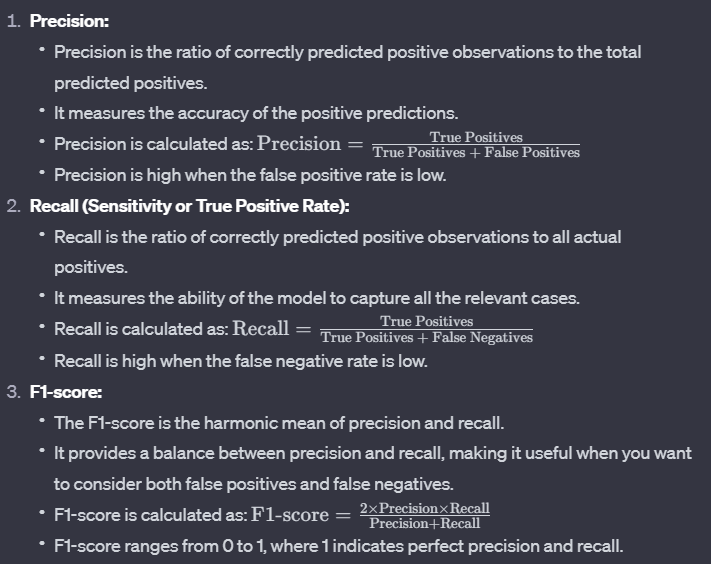


In [21]:
def conf_mat(y_test, y_test_pred):
  con_mat=confusion_matrix(y_test, y_test_pred)
  labels = ['No Fraud', 'Fraud']
  sns.heatmap(con_mat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

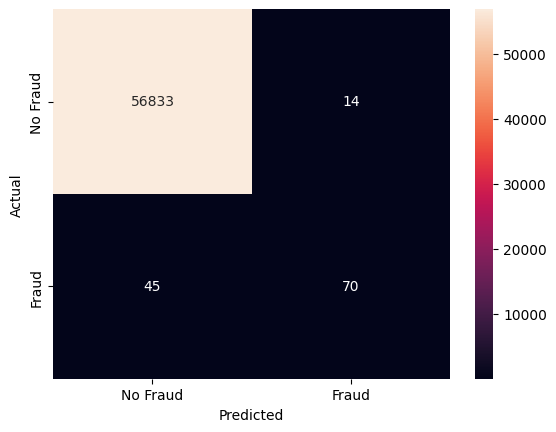

In [22]:
conf_mat(y_test, y_test_pred)

# KNEIGHBORS CLASSIFICATION MODEL

In [23]:
def KNeighbors(x_train, y_train, x_test):
  Kneib=KNeighborsClassifier(n_neighbors=4)
  Kneib.fit(x_train, y_train)
  y_train_pred=Kneib.predict(x_train)
  y_train_cl_report=classification_report(y_train, y_train_pred, target_names = ['No Fraud', 'Fraud'])
  print("_"*50)
  print("TRAIN MODEL CLASSIFICATION REPORT")
  print("_"*50)
  print(y_train_cl_report)
  y_test_pred=Kneib.predict(x_test)
  y_test_cl_report=classification_report(y_test, y_test_pred, target_names = ['No Fraud', 'Fraud'])
  print("_"*50)
  print("TEST MODEL CLASSIFICATION REPORT")
  print("_"*50)
  print(y_test_cl_report)
  print("_"*50)
  return y_test_pred,Kneib

In [24]:
y_test_pred, Kneib=KNeighbors(x_train, y_train, x_test)

__________________________________________________
TRAIN MODEL CLASSIFICATION REPORT
__________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    227468
       Fraud       0.97      0.79      0.87       377

    accuracy                           1.00    227845
   macro avg       0.99      0.89      0.93    227845
weighted avg       1.00      1.00      1.00    227845

__________________________________________________
TEST MODEL CLASSIFICATION REPORT
__________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56847
       Fraud       0.95      0.78      0.86       115

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

__________________________________________________


#### the model performs exceptionally well in identifying "No Fraud" instances,achieving perfect precision and recall. However, for the "Fraud" class, there is room for improvement, especially in terms of recall, as it correctly identifies only 78% of actual fraud cases.

# ROC Curve and Optimal Thresholds for Logistic Regression and K-Neighbors Models


In [25]:
lr_prob=lr.predict_proba(x_test)
KNeib_prob=Kneib.predict_proba(x_test)
fpr1, tpr1, thresh1=roc_curve(y_test, lr_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2=roc_curve(y_test, KNeib_prob[:,1], pos_label=1)

optimal_thres_lr=thresh1[np.argmax(tpr1 - fpr1)]
optimal_thres_KNeib=thresh2[np.argmax(tpr2 - fpr2)]
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
print(f" optimal_thres_lr\t {optimal_thres_lr} \n optimal_thres_KNeib\t{optimal_thres_KNeib}")

 optimal_thres_lr	 0.007890862084915292 
 optimal_thres_KNeib	0.25


In [26]:
opt={'Logistic Regression':optimal_thres_lr,'KNeighbors Classification':optimal_thres_KNeib}
for model, thresh in opt.items():
  if model == 'Logistic Regression':
    y_test_pred_adj=lr.predict_proba(x_test)[:,1]
  elif model =='KNeighbors Classification':
    y_test_pred_adj=Kneib.predict_proba(x_test)[:,1]

  y_test_pred_adj1 = (y_test_pred_adj >= thresh).astype(int)
  ac_score = accuracy_score(y_test, y_test_pred_adj1)
  ROC_AC=roc_auc_score(y_test, y_test_pred_adj1)

  print("_" * 50)
  print(f"Model: {model}")
  print(f"Threshold: {thresh}")
  print(f"Accuracy Score: {ac_score}")
  print(f"ROC Accuracy Score: {ROC_AC}")
  print("_" * 50)

  y_test_cl_report_adj = classification_report(y_test, y_test_pred_adj1, target_names=['No Fraud', 'Fraud'])
  print("_" * 50)
  print("Classification Report:")
  print(y_test_cl_report_adj)
  print("_" * 50)

__________________________________________________
Model: Logistic Regression
Threshold: 0.007890862084915292
Accuracy Score: 0.9960675538078017
ROC Accuracy Score: 0.945961432709156
__________________________________________________
__________________________________________________
Classification Report:
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56847
       Fraud       0.33      0.90      0.48       115

    accuracy                           1.00     56962
   macro avg       0.66      0.95      0.74     56962
weighted avg       1.00      1.00      1.00     56962

__________________________________________________
__________________________________________________
Model: KNeighbors Classification
Threshold: 0.25
Accuracy Score: 0.9985955549313578
ROC Accuracy Score: 0.9298718681189247
__________________________________________________
__________________________________________________
Classification Report:
              p

## RESULT UNDERSTANDING
* The model is highly accurate overall but has room for improvement in precision for the "Fraud" class.
* The chosen threshold of 0.25 results in a trade-off between precision and recall.
* Depending on the specific requirements and priorities, you might want to adjust the threshold to optimize for precision, recall, or another metric.

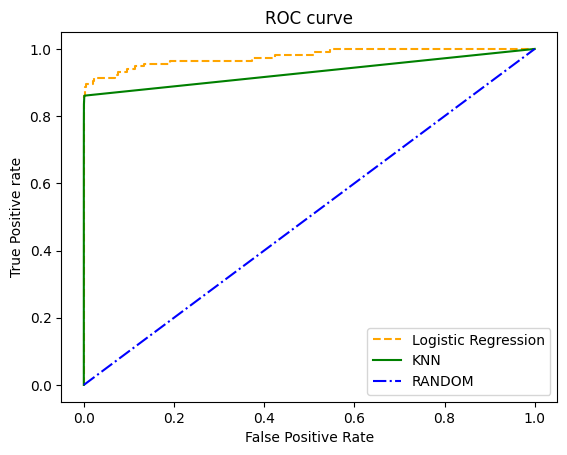

In [27]:

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='dashdot',color='blue', label='RANDOM')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

* The ROC curves compare the performance of Logistic Regression, K-Neighbors (KNN), and a Random Classifier.
* Logistic Regression and K-Neighbors outperform the random classifier in distinguishing between classes.
* The area under the ROC curve (AUC) provides a quantitative measure of the model's discriminative ability.
* Consider the trade-off between false positives and true positives when selecting a model or threshold.

# RESAMPLING TECHNIQUES

In [28]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- Data is not balanced if you see 0 legit transactions are 284315, where as fraud transations are 492
- so we are using the Resampling Technique

## Under-sampling the Majority Class:
- Randomly remove instances from the majority class to balance the class distribution.
- Be cautious not to remove too much data, as it may result in information loss.
- Created the 2 dataset based on classifications with equal rows

In [29]:
df_0 = data[data['Class'] == 0].sample(n=492, random_state=42)
df_1= data[data['Class'] == 1].sample(n=492, random_state=42)

In [30]:
print(f' Fraud Shape{df_1.shape}\n No Fraud shape{df_0.shape}')

 Fraud Shape(492, 31)
 No Fraud shape(492, 31)


In [31]:
df_concat=pd.concat([df_0,df_1], ignore_index=True)

## DATSET IS READY

In [32]:
df_concat.shape

(984, 31)

# BALANCE DATASET TRAIN TEST SPLIT

In [33]:
x_bal_dummy=df_concat.drop('Class', axis=1)
y_bal=df_concat['Class']
print(x_bal_dummy.shape, '\n', y_bal.shape)

(984, 30) 
 (984,)


In [34]:
x_bal=scaler.fit_transform(x_bal_dummy)

In [35]:
x_train_b, x_test_b, y_train_b, y_test_b=train_test_split(x_bal,y_bal, test_size=0.20, random_state=123)
print(f'x_train{x_train_b.shape}\n, x_test{x_test_b.shape}\n, y_train{y_train_b.shape}\n, y_test{y_test_b.shape}')

x_train(787, 30)
, x_test(197, 30)
, y_train(787,)
, y_test(197,)


# BALANCE DATASET LOGISTIC REGRESSION

In [40]:
bal_lr=LogisticRegression()
bal_lr.fit(x_train_b,y_train_b)
bal_pred_train=bal_lr.predict(x_train_b)
bal_pred_test=bal_lr.predict(x_test_b)

In [43]:
bal_cl_report_train=classification_report(y_train_b,bal_pred_train)
print(bal_cl_report_train)
bal_cl_report_test=classification_report(y_test_b,bal_pred_test)
print(bal_cl_report_test)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       383
           1       0.98      0.92      0.95       404

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       109
           1       0.96      0.92      0.94        88

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



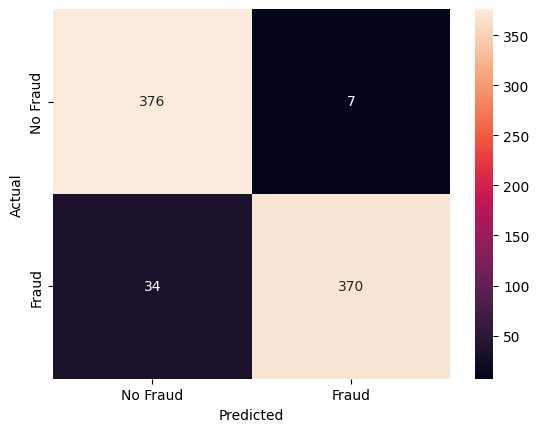

In [44]:
conf_mat(y_train_b,bal_pred_train)

# Logistic Regression:

- **Precision:**
  - Class 0: 0.92 (92%)
  - Class 1: 0.98 (98%)

- **Recall (Sensitivity):**
  - Class 0: 0.98 (98%)
  - Class 1: 0.92 (92%)

- **F1-score:**
  - Class 0: 0.95 (95%)
  - Class 1: 0.95 (95%)

- **Support:**
  - Class 0: 383 instances
  - Class 1: 404 instances

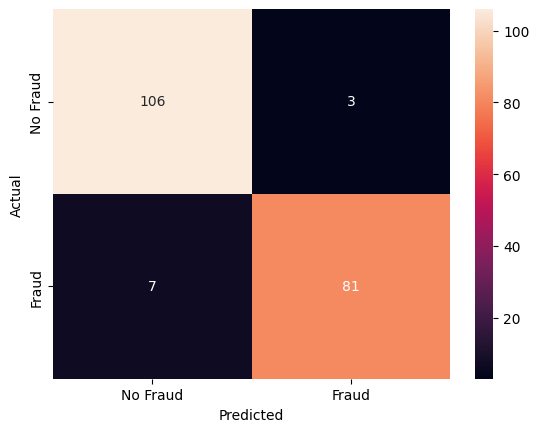

In [45]:
conf_mat(y_test_b,bal_pred_test)

# BALANCE DATASET KNEIGHBORS CLASSIFICATION

In [46]:
knn=KNeighborsClassifier()
knn.fit(x_train_b,y_train_b)
knn_bal_pred_train=bal_lr.predict(x_train_b)
knn_bal_pred_test=bal_lr.predict(x_test_b)


In [47]:
knn_bal_cl_report_train=classification_report(y_train_b,knn_bal_pred_train)
print(knn_bal_cl_report_train)
knn_bal_cl_report_test=classification_report(y_test_b,knn_bal_pred_test)
print(knn_bal_cl_report_test)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       383
           1       0.98      0.92      0.95       404

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       109
           1       0.96      0.92      0.94        88

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



# Confusion Matrix for Train and Test

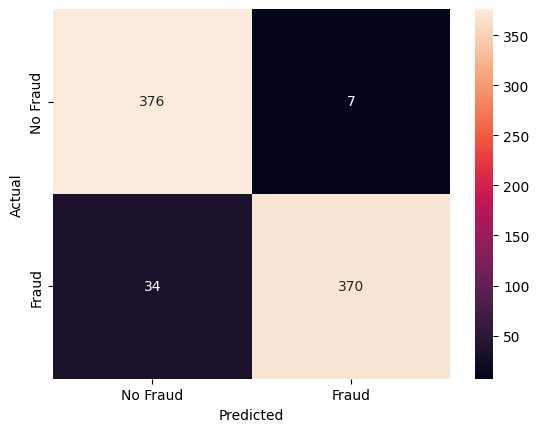

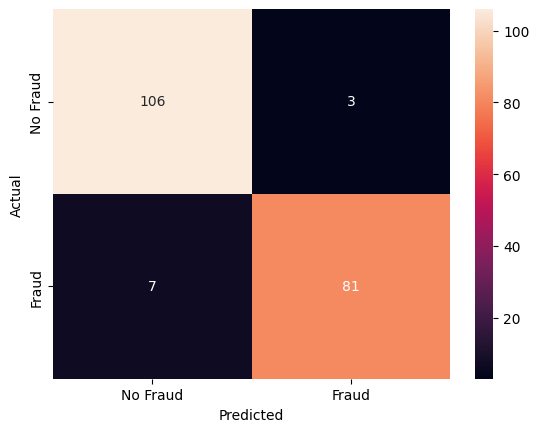

In [49]:
conf_mat(y_train_b,knn_bal_pred_train)
conf_mat(y_test_b,knn_bal_pred_test)

# K-Neighbors:

- **Precision:**
  - Class 0: 0.92 (92%)
  - Class 1: 0.98 (98%)

- **Recall (Sensitivity):**
  - Class 0: 0.98 (98%)
  - Class 1: 0.92 (92%)

- **F1-score:**
  - Class 0: 0.95 (95%)
  - Class 1: 0.95 (95%)

- **Support:**
  - Class 0: 383 instances
  - Class 1: 404 instances


## Summary:

1. Both models (Logistic Regression and K-Neighbors) perform exceptionally well, achieving high precision, recall, and F1-scores for both classes.

2. The models show balanced performance in correctly identifying instances of both classes (0 and 1), as indicated by the similarity in precision and recall values.

3. The F1-scores for both classes are also high, suggesting a good balance between precision and recall.


## Conclusion:

- Both models are effective in handling the classification task with high accuracy and balanced performance across classes.

- Depending on the specific requirements of your problem (e.g., the importance of false positives vs. false negatives), you may choose one model over the other based on the balance between precision and recall.

- Consider the context of your application and whether certain misclassifications are more costly than others when selecting a final model.

- Further analysis, such as feature importance or exploring additional evaluation metrics, could provide additional insights into the model's behavior and help in making a more informed decision.